
# ***The NYC Department of Finance collects data on every parking ticket issued in NYC (~10M per year!)***

# **which features are responsible for increase or decrease in the number of parking tickets**??????

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install dask[dataframe]

     |████████████████████████████████| 112kB 16.6MB/s 


In [ ]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from functools import reduce

In [ ]:
fy14 = dd.read_csv("/content/drive/MyDrive/dask_data/Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv")
fy15 = dd.read_csv("/content/drive/MyDrive/dask_data/Parking_Violations_Issued_-_Fiscal_Year_2015.csv")
fy16 = dd.read_csv("/content/drive/MyDrive/dask_data/Parking_Violations_Issued_-_Fiscal_Year_2016.csv")
fy17 = dd.read_csv("/content/drive/MyDrive/dask_data/Parking_Violations_Issued_-_Fiscal_Year_2017.csv")

In [ ]:
columns = [set(fy14.columns),set(fy15.columns),set(fy16.columns),set(fy17.columns)]
common_columns = list(reduce(lambda x,y: x.intersection(y),columns))

In [ ]:
dtype_tuples = [(x,np.str) for x in common_columns]

dtypes = dict(dtype_tuples)

In [ ]:
fy14 = dd.read_csv("/content/drive/MyDrive/dask_data/Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv",usecols=common_columns,dtype=dtypes)
fy15 = dd.read_csv("/content/drive/MyDrive/dask_data/Parking_Violations_Issued_-_Fiscal_Year_2015.csv",usecols=common_columns,dtype=dtypes)
fy16 = dd.read_csv("/content/drive/MyDrive/dask_data/Parking_Violations_Issued_-_Fiscal_Year_2016.csv",usecols=common_columns,dtype=dtypes)
fy17 = dd.read_csv("/content/drive/MyDrive/dask_data/Parking_Violations_Issued_-_Fiscal_Year_2017.csv",usecols=common_columns,dtype=dtypes)

In [ ]:
fy =dd.concat([fy14,fy15,fy16,fy17],axis=0)

In [ ]:
columns_to_drop = ['Vehicle Color','Plate ID','Issuing Agency','Street Code1','Street Code2','Street Code3','Vehicle Expiration Date',
               'Violation Location','Violation Precinct','Issuer Precinct','Issuer Code','Issuer Command','Issuer Squad','Time First Observed',
              'Violation In Front Of Or Opposite','House Number','Street Name','Intersecting Street','Date First Observed','Law Section',
              'Sub Division','Violation Legal Code','From Hours In Effect','To Hours In Effect','Meter Number','Feet From Curb',
              'Hydrant Violation','Double Parking Violation','Violation Post Code','No Standing or Stopping Violation','Summons Number']

In [ ]:
with ProgressBar():
        data = fy.drop(columns_to_drop,axis=1).compute()

[########################################] | 100% Completed |  4min 54.9s


In [ ]:
sns.set(color_codes=True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


# **How the number of tickets given changes with each month????**

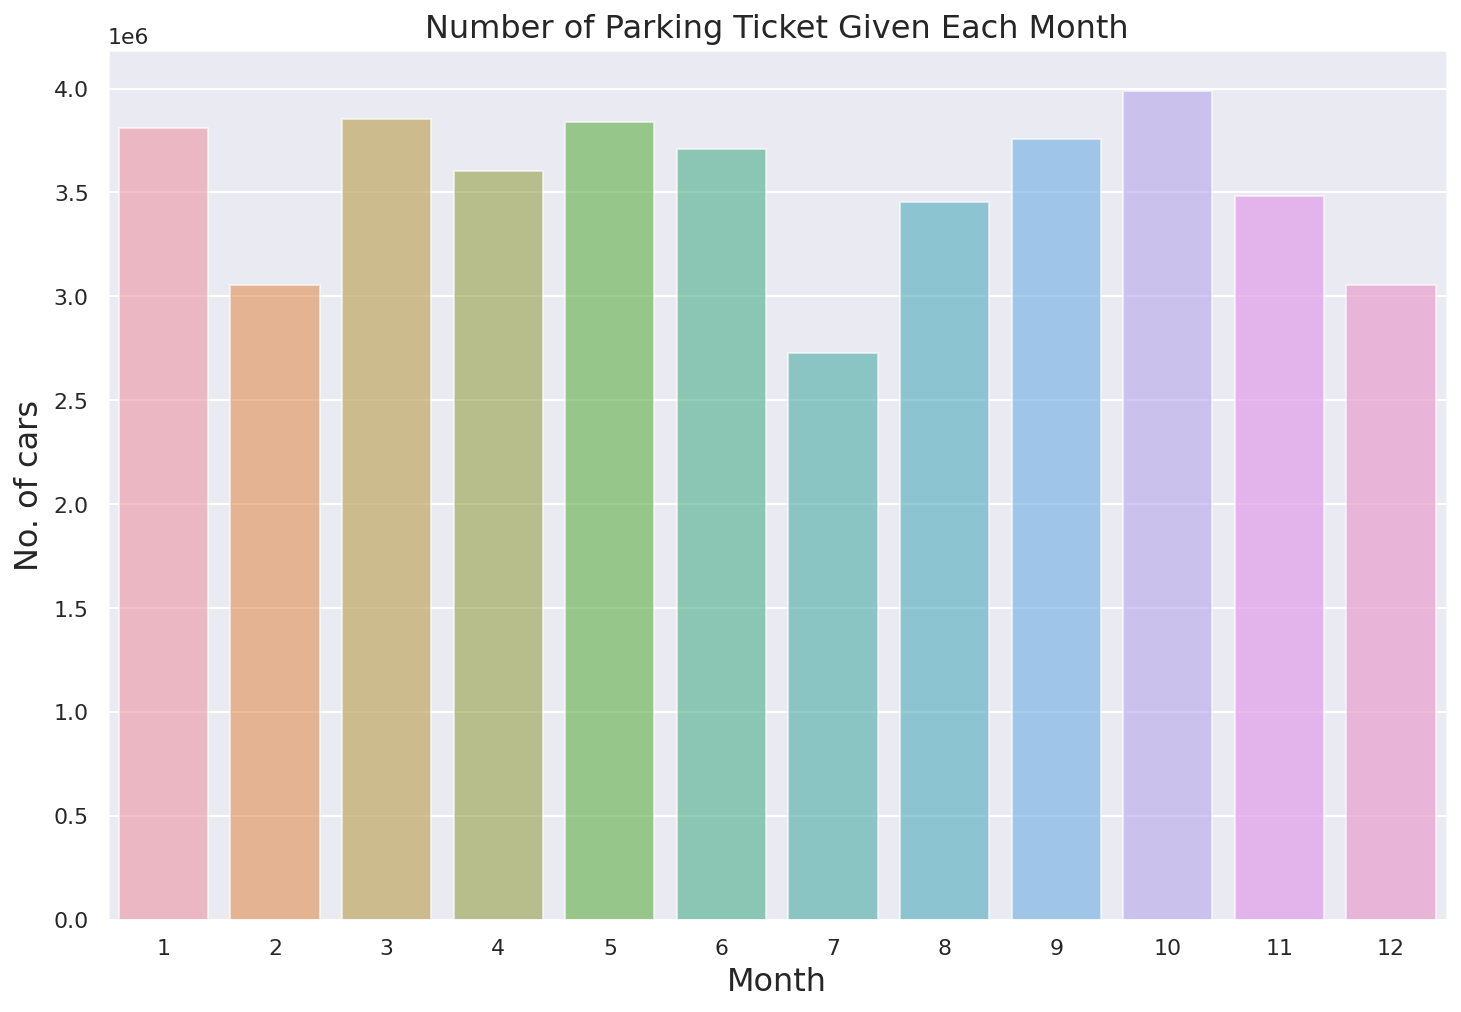

In [ ]:
month = []
for time in pd.to_datetime(data['Issue Date']):
    month.append(time.month)
count = pd.Series(month).value_counts()

plt.figure(figsize=(12,8))
sns.barplot(y=count.values, x=count.index, alpha=0.6)
plt.title("Number of Parking Ticket Given Each Month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.ylabel("No. of cars", fontsize=16)
plt.show();


So from the barplot above  October has the highest number of tickets!


## Barplot of 'Registration State'

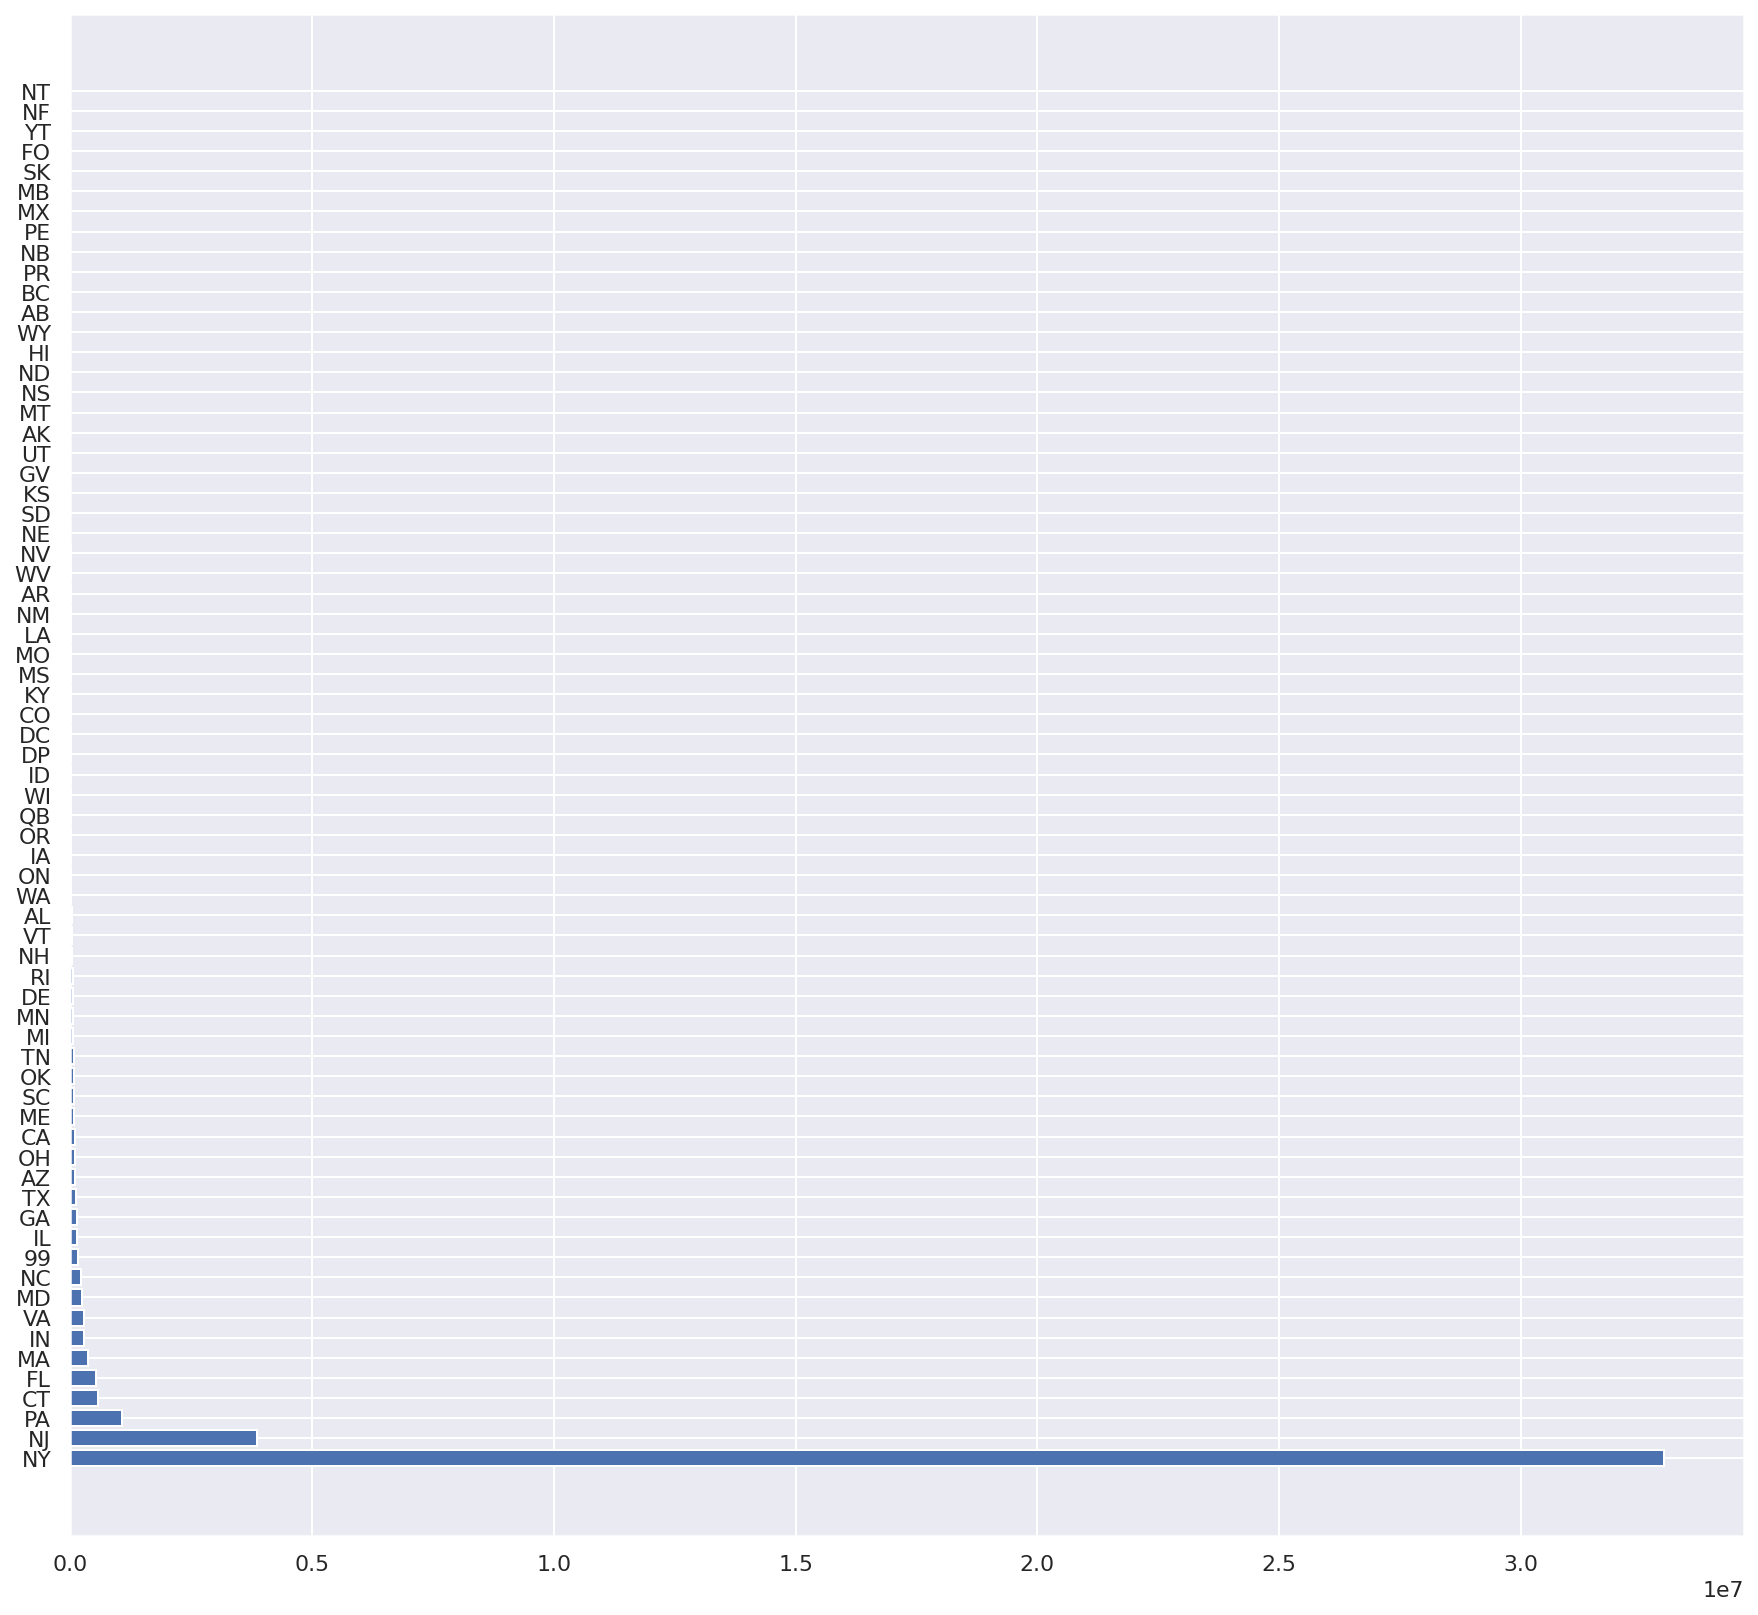

In [ ]:
x_ticks = data['Registration State'].value_counts().index
heights = data['Registration State'].value_counts()
y_pos = np.arange(len(x_ticks))
fig = plt.figure(figsize=(15,14)) 
# Create horizontal bars
plt.barh(y_pos, heights)
 
# Create names on the y-axis
plt.yticks(y_pos, x_ticks)
 
# Show graphic
plt.show()

In [ ]:
pd.DataFrame(data['Registration State'].value_counts()/len(data)).nlargest(10, columns = ['Registration State'])

,Registration State
NY,0.778573
NJ,0.091024
PA,0.025254
CT,0.013783
FL,0.012848
MA,0.008608
IN,0.006949
VA,0.006853
MD,0.005571
NC,0.005135


You can see from the barplot above: in our sample ~77.85% cars are registered in state : NY. After that 9.10% cars are registered in state : NJ, followed by PA, CT, and FL.

# How many parking tickets are given for each violation code?

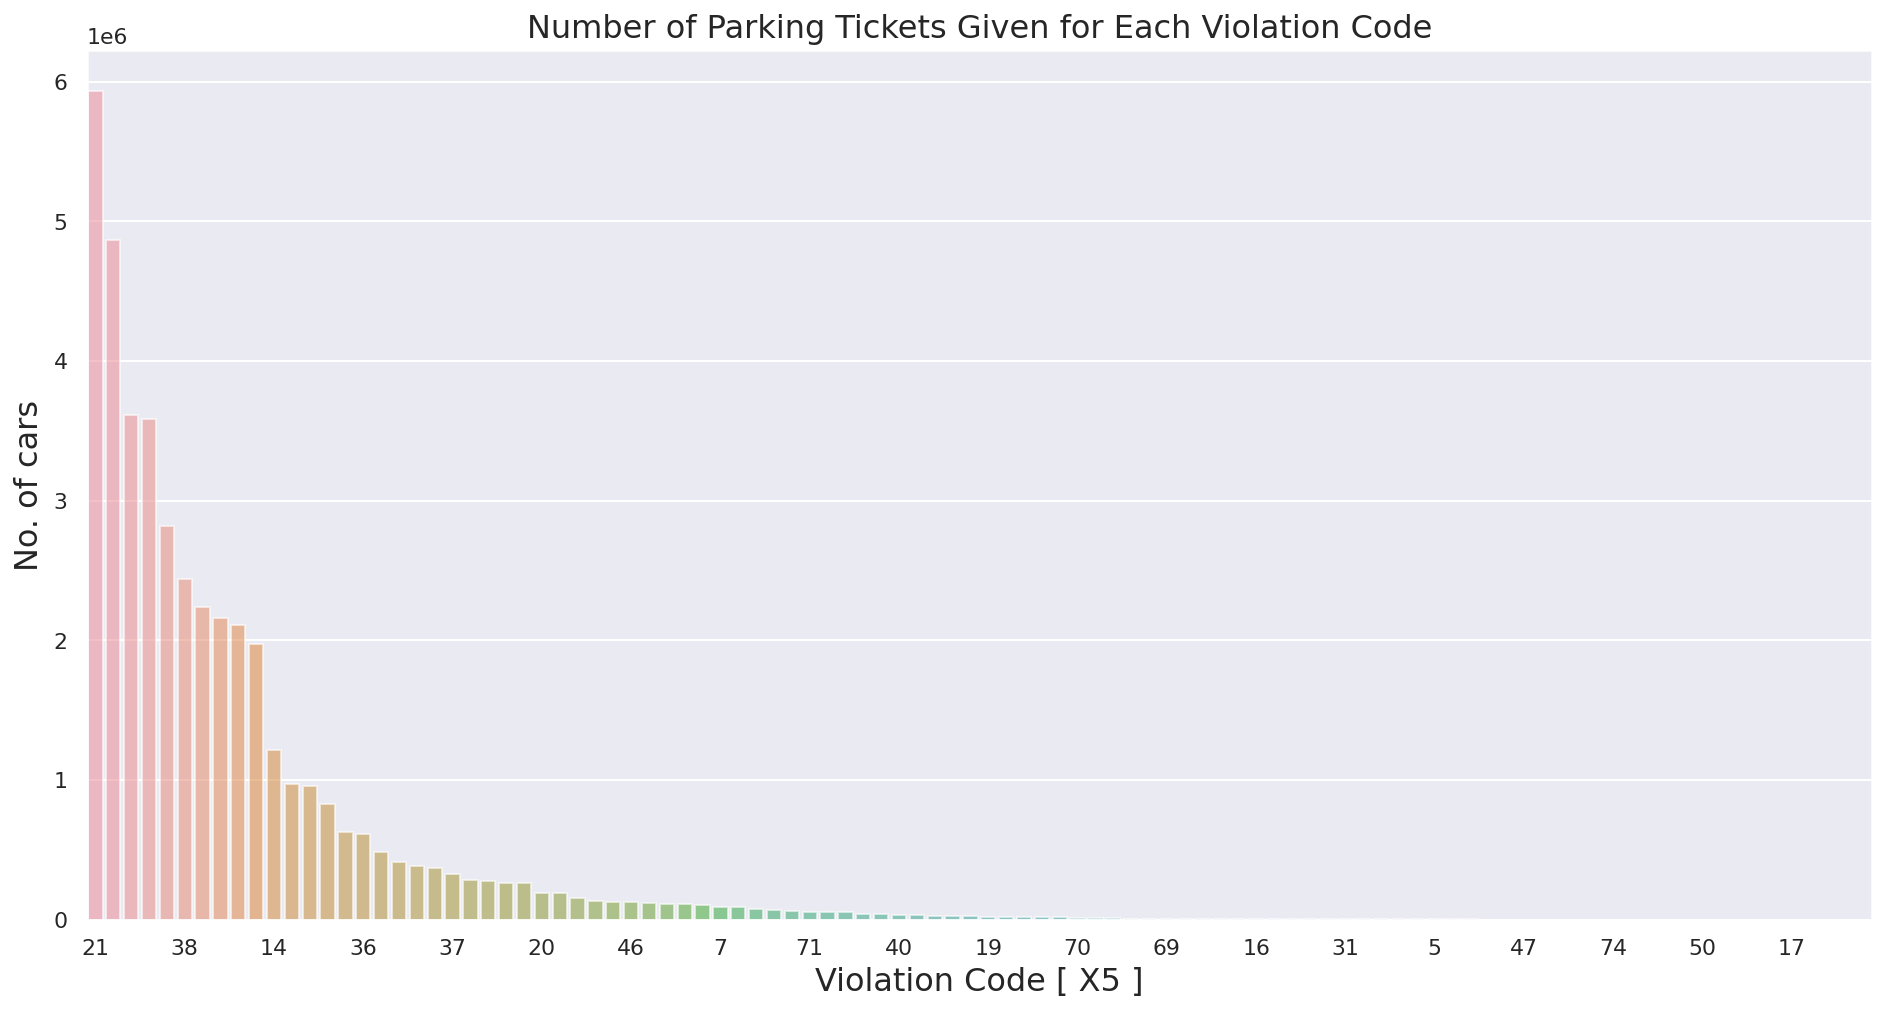

In [ ]:
violation_code = data['Violation Code'].value_counts()

plt.figure(figsize=(16,8))
f = sns.barplot(y=violation_code.values, x=violation_code.index, alpha=0.6)
#plt.xticks(np.arange(0,101, 10.0))
f.set(xticks=np.arange(0,100, 5.0))
plt.title("Number of Parking Tickets Given for Each Violation Code", fontsize=16)
plt.xlabel("Violation Code [ X5 ]", fontsize=16)
plt.ylabel("No. of cars", fontsize=16)
plt.show();

# Parking ticket vs county

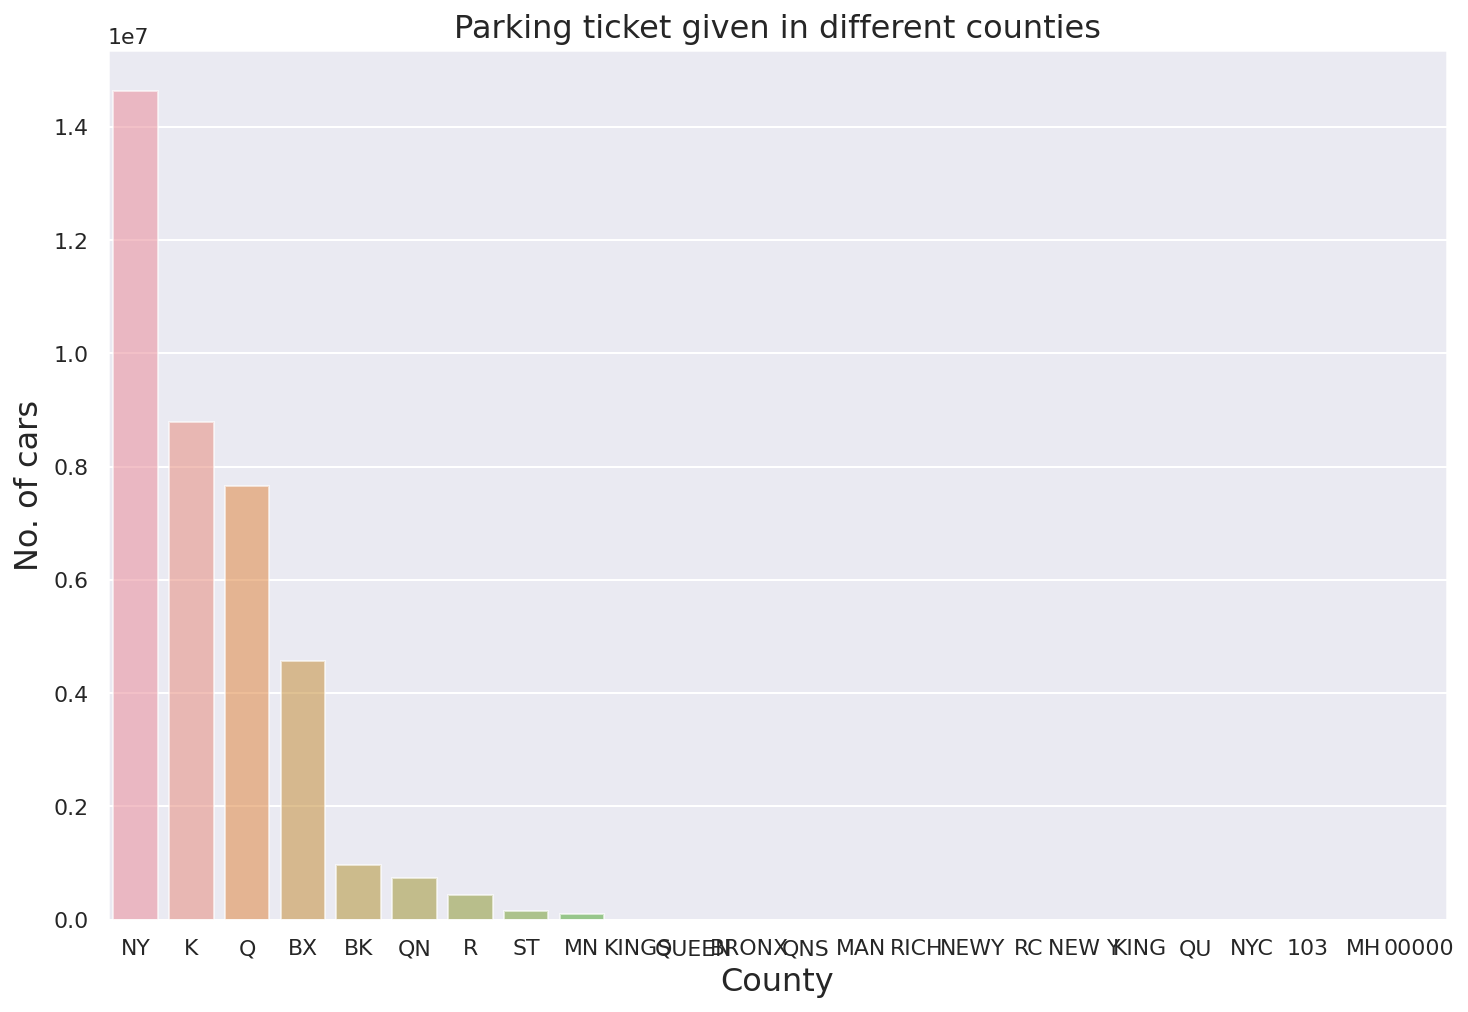

In [ ]:
violation_county = data['Violation County'].value_counts()

plt.figure(figsize=(12,8))
f = sns.barplot(y=violation_county.values, x=violation_county.index, alpha=0.6)
# remove labels
plt.tick_params(labelbottom='on')
plt.ylabel('No. of cars', fontsize=16);
plt.xlabel('County', fontsize=16);
plt.title('Parking ticket given in different counties', fontsize=16);

# Unregistered Vehicle?

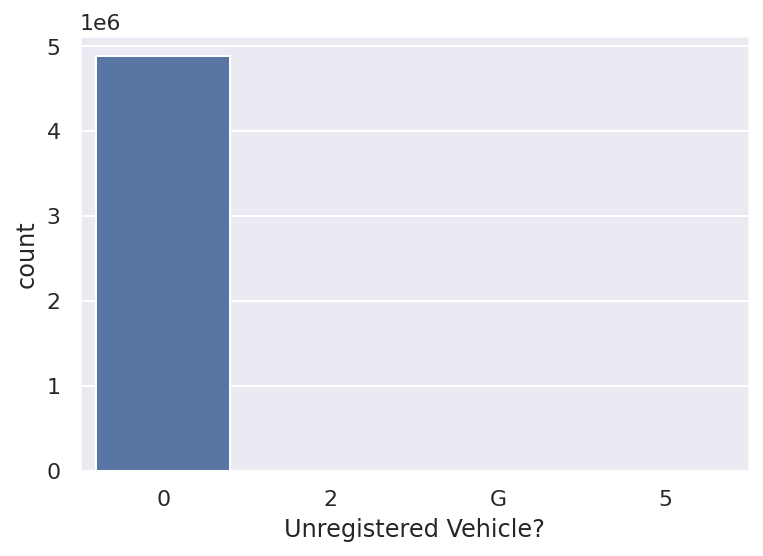

In [ ]:
sns.countplot(x = 'Unregistered Vehicle?', data = data)